# Análise de Dados de Logística
## 1. Introdução
Este notebook tem como objetivo realizar uma análise exploratória de dados (EDA) em um conjunto de dados de logística. A análise visa identificar padrões, tendências e insights que possam otimizar as operações de transporte e entrega.

### Descrição da Base de Dados
A base de dados contém informações sobre viagens de transporte, incluindo detalhes como provedor de GPS, IDs de reserva, locais de origem e destino, datas e horários de viagem, tipo de veículo, distância percorrida, status de entrega (no prazo ou atrasado), e informações sobre clientes e fornecedores

### 1.2 Objetivos da Análise
- Compreender a distribuição das variáveis chave, como distância de transporte, duração da viagem e status de entrega.
- Identificar outliers e anomalias nos dados que possam impactar a eficiência das operações.
- Explorar correlações entre variáveis para entender fatores que influenciam atrasos nas entregas.
- Visualizar os dados de forma clara e informativa para facilitar a interpretação dos resultados.
- Fornecer insights acionáveis para melhorar a logística e o planejamento de rotas.
- Preparar os dados para análises futuras, como modelagem preditiva ou otimização de rotas.


### 1.3 metodos core do projeto

In [111]:
def save_base_cleaned(df, nome_base="base_limpa", pasta="."):
    arquivos = [
        f for f in os.listdir(pasta) if f.startswith(nome_base) and f.endswith(".csv")
    ]

    if not arquivos:
        novo_num = 1
    else:
        nums = [int(f.replace(".csv", "").split("_")[-1]) for f in arquivos]
        novo_num = max(nums) + 1

    nome_arquivo = os.path.join(pasta, f"{nome_base}_{novo_num}.csv")
    df.to_csv(nome_arquivo, index=False)

## 2. Carregamento e Pré-processamento de Dados

### 2.1 imports

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import kagglehub
from sklearn.preprocessing import (
    MinMaxScaler,
    OrdinalEncoder,
    RobustScaler,
    OneHotEncoder,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle

### 2.2 Carregamento dos Dados

In [113]:
path = kagglehub.dataset_download(
    "nicolemachado/transportation-and-logistics-tracking-dataset"
)
excel_path = os.path.join(path, "Transportation and Logistics Tracking Dataset..xlsx")
df = pd.read_excel(excel_path, sheet_name="Primary data")
df

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,32 FT Single-Axle 7MT - HCV,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,32 FT Multi-Axle 14MT - HCV,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,1 MT Tata Ace (Open Body),NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,32 FT Multi-Axle 14MT - HCV,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,32 FT Multi-Axle 14MT - HCV,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,JTECH,WDSBKTP42751,Regular,2019-03-27 17:25:33.000,KA219502,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka","13.007503209603689,77.665098855934886","13.068901840235711,77.590655738806618",2019-06-14 15:20:12,...,12.0,25 FT Open Body 21MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,TOOL KIT SET
6876,JTECH,WDSBKTP43203,Regular,2019-03-31 15:02:34.000,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,...,31.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,CONTROL LEVER ASSY
6877,JTECH,WDSBKTP43021,Regular,2019-03-29 18:56:26.000,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6878,JTECH,WDSBKTP42685,Regular,2019-03-27 08:29:45.000,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE


### 2.3 informações do dataframe

In [114]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

### 2.4 tratando dados ausentes e outliers absurdos

In [115]:
colunas_nulas = df.columns[
    df.isnull().any() & ~df.columns.isin(["delay", "ontime"])
].tolist()

for col in colunas_nulas:
    if df[col].dtype == "object":
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
    elif df[col].dtype in ["int64", "float64"]:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)


print(df.isnull().sum())

GpsProvider                              0
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                         0
DestinationLocation                      0
actual_eta                               0
Curr_lat                                 0
Curr_lon                                 0
ontime                                4332
delay                                 2538
OriginLocation_Code                      0
DestinationLocation_Code                 0
trip_start_date                          0
trip_end_date                            0
TRANSPORTATION_DISTANCE_IN_KM            0
vehicleType

### 2.5 tratando dados de data

In [116]:
# Converter colunas de data para o tipo datetime
date_cols = [
    "BookingID_Date",
    "Planned_ETA",
    "actual_eta",
    "trip_start_date",
    "trip_end_date",
]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
df.info()
df["trip_duration_hours"] = (
    df["actual_eta"] - df["trip_start_date"]
).dt.total_seconds() / 3600


df["trip_duration_hours"] = (
    df["actual_eta"] - df["trip_start_date"]
).dt.total_seconds() / 3600


# Remover registros com duração de viagem negativa ou zero - outliers absurdos
df = df[df["trip_duration_hours"] > 0]
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         6880 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,trip_duration_hours
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,32 FT Single-Axle 7MT - HCV,250.0,MANU,8.930762e+09,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE,263.650958
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,32 FT Multi-Axle 14MT - HCV,250.0,RAMESH,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143,20.406946
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,1 MT Tata Ace (Open Body),250.0,GIRI,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO,22.107443
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,32 FT Multi-Axle 14MT - HCV,250.0,RAVI,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD,12.045277
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,32 FT Multi-Axle 14MT - HCV,250.0,TAMIL,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT,13.150591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,JTECH,WDSBKTP45240,Regular,2019-04-23 12:32:42.000,KA21A6239,"Mugabala, Bangalore Rural, Karnataka","Bangalore International Airport, Bangalore, Ka...","16.560192249175344,80.792293091599547","13.199089183304451,77.708554234959038",2019-06-14 15:20:12,...,40 FT 3XL Trailer 35MT,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,HORN NP.027,3.250000
6876,JTECH,WDSBKTP43203,Regular,2019-03-31 15:02:34.000,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,...,40 FT 3XL Trailer 35MT,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,CONTROL LEVER ASSY,2.350000
6877,JTECH,WDSBKTP43021,Regular,2019-03-29 18:56:26.000,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-06-14 15:20:12,...,40 FT 3XL Trailer 35MT,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE,4.150000
6878,JTECH,WDSBKTP42685,Regular,2019-03-27 08:29:45.000,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-06-14 15:20:12,...,40 FT 3XL Trailer 35MT,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE,1.100000


### 2.6 visao geral do dataframe depois de tratada

In [117]:
df.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,trip_duration_hours
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,32 FT Single-Axle 7MT - HCV,250.0,MANU,8.930762e+09,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE,263.650958
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,32 FT Multi-Axle 14MT - HCV,250.0,RAMESH,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143,20.406946
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,1 MT Tata Ace (Open Body),250.0,GIRI,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO,22.107443
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,32 FT Multi-Axle 14MT - HCV,250.0,RAVI,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD,12.045277
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,32 FT Multi-Axle 14MT - HCV,250.0,TAMIL,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT,13.150591


## 3. Análise Exploratória de Dados (EDA)

### 3.1. Estatísticas Descritivas
Vamos começar com uma visão geral estatística dos dados numéricos e categóricos para entender a sua distribuição e identificar possíveis anomalias.

In [118]:
print("Estatísticas Descritivas para Colunas Numéricas:")
print(df.describe())

print("Estatísticas Descritivas para Colunas Categóricas:")
print(df.describe(include="object"))

print("Distribuição da Duração da Viagem (horas):")
print(df["trip_duration_hours"].describe())

Estatísticas Descritivas para Colunas Numéricas:
                      BookingID_Date                 Data_Ping_time  \
count                           6839                           5889   
mean   2020-02-07 17:33:36.753620736  2020-04-05 22:06:27.730707712   
min              2019-03-18 12:19:22            2019-06-07 18:25:10   
25%              2019-10-11 18:27:01            2019-12-01 07:30:20   
50%              2020-01-20 11:07:12            2020-06-19 11:00:29   
75%              2020-07-30 11:10:24            2020-08-10 19:35:12   
max       2020-08-28 12:44:27.290000            2020-08-28 12:40:31   
std                              NaN                            NaN   

                         Planned_ETA                     actual_eta  \
count                           6839                           6839   
mean   2020-01-28 03:19:45.167716352  2020-02-06 23:26:40.208600576   
min              1899-12-30 04:06:00            1899-12-30 03:21:00   
25%              2019-10-12

### 3.2. Análise da Distribuição das Variáveis e Identificação de Outliers
Vamos analisar a distribuição de algumas variáveis chave e identificar possíveis outliers que possam impactar a análise.

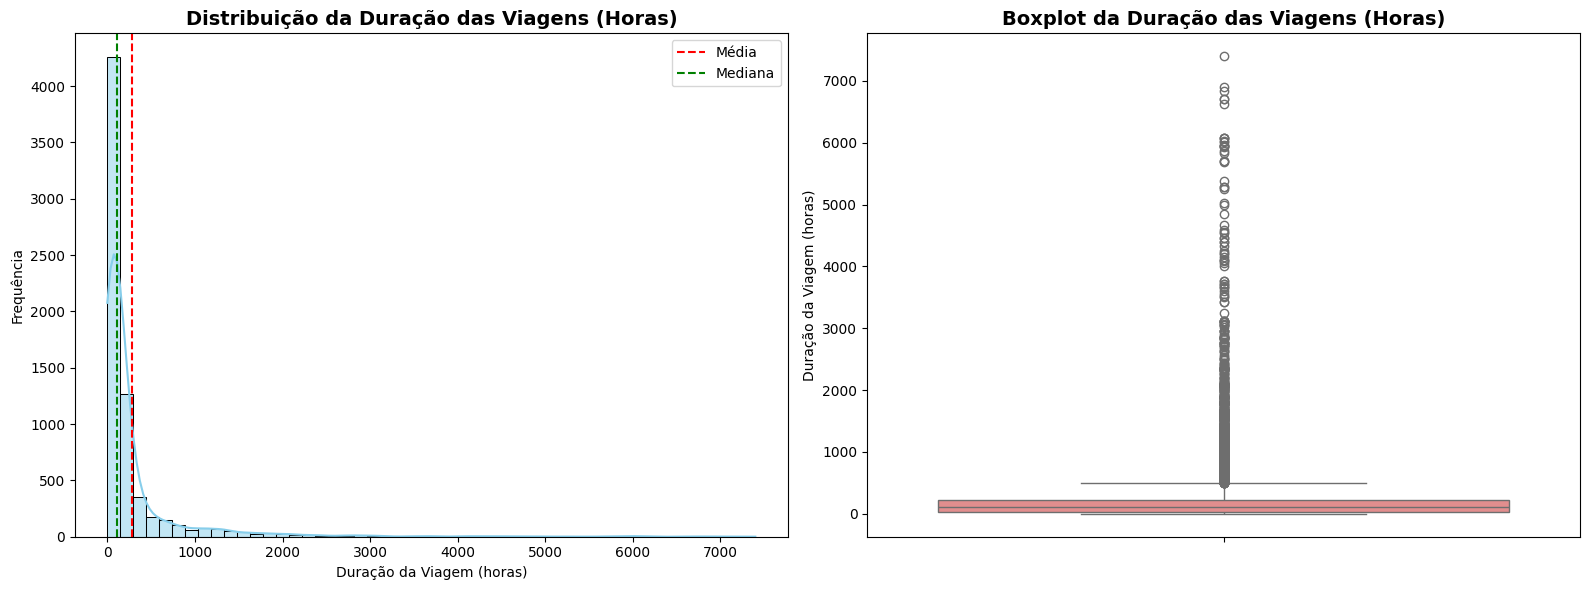

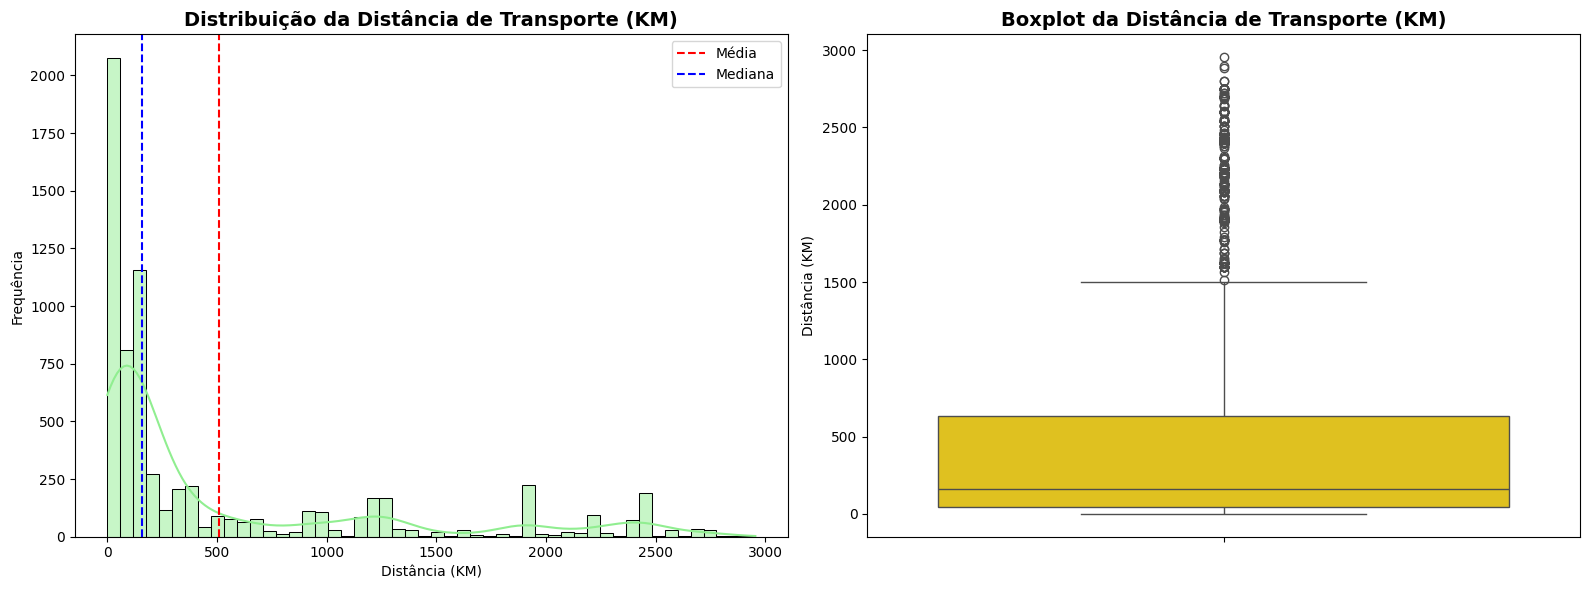

 Número de outliers na duração da viagem: 868
Exemplo de outliers na duração da viagem:


,BookingID,trip_duration_hours,TRANSPORTATION_DISTANCE_IN_KM
1086,AEIBK2022716,860.913863,1000.0
1216,AEIBK2023415,633.667401,1900.0
1358,AEIBK2021224,1244.548892,1199.0
1359,AEIBK2021709,1098.553873,1330.0
1360,AEIBK2020139,1619.423786,2230.0


In [119]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df["trip_duration_hours"], bins=50, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title(
    "Distribuição da Duração das Viagens (Horas)", fontsize=14, weight="bold"
)
axes[0].set_xlabel("Duração da Viagem (horas)")
axes[0].set_ylabel("Frequência")
axes[0].axvline(
    df["trip_duration_hours"].mean(), color="red", linestyle="--", label="Média"
)
axes[0].axvline(
    df["trip_duration_hours"].median(), color="green", linestyle="--", label="Mediana"
)
axes[0].legend()

sns.boxplot(y=df["trip_duration_hours"], ax=axes[1], color="lightcoral")
axes[1].set_title("Boxplot da Duração das Viagens (Horas)", fontsize=14, weight="bold")
axes[1].set_ylabel("Duração da Viagem (horas)")

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma + KDE
sns.histplot(
    df["TRANSPORTATION_DISTANCE_IN_KM"],
    bins=50,
    kde=True,
    ax=axes[0],
    color="lightgreen",
)
axes[0].set_title(
    "Distribuição da Distância de Transporte (KM)", fontsize=14, weight="bold"
)
axes[0].set_xlabel("Distância (KM)")
axes[0].set_ylabel("Frequência")
axes[0].axvline(
    df["TRANSPORTATION_DISTANCE_IN_KM"].mean(),
    color="red",
    linestyle="--",
    label="Média",
)
axes[0].axvline(
    df["TRANSPORTATION_DISTANCE_IN_KM"].median(),
    color="blue",
    linestyle="--",
    label="Mediana",
)
axes[0].legend()

# Boxplot
sns.boxplot(y=df["TRANSPORTATION_DISTANCE_IN_KM"], ax=axes[1], color="gold")
axes[1].set_title("Boxplot da Distância de Transporte (KM)", fontsize=14, weight="bold")
axes[1].set_ylabel("Distância (KM)")

plt.tight_layout()
plt.show()

Q1 = df["trip_duration_hours"].quantile(0.25)
Q3 = df["trip_duration_hours"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_duration = df[
    (df["trip_duration_hours"] < lower_bound)
    | (df["trip_duration_hours"] > upper_bound)
]

print(f" Número de outliers na duração da viagem: {len(outliers_duration)}")
print("Exemplo de outliers na duração da viagem:")
display(
    outliers_duration[
        ["BookingID", "trip_duration_hours", "TRANSPORTATION_DISTANCE_IN_KM"]
    ].head()
)

### 3.3. Análise de Correlações
Vamos investigar as correlações entre as variáveis numéricas para entender como elas se relacionam.

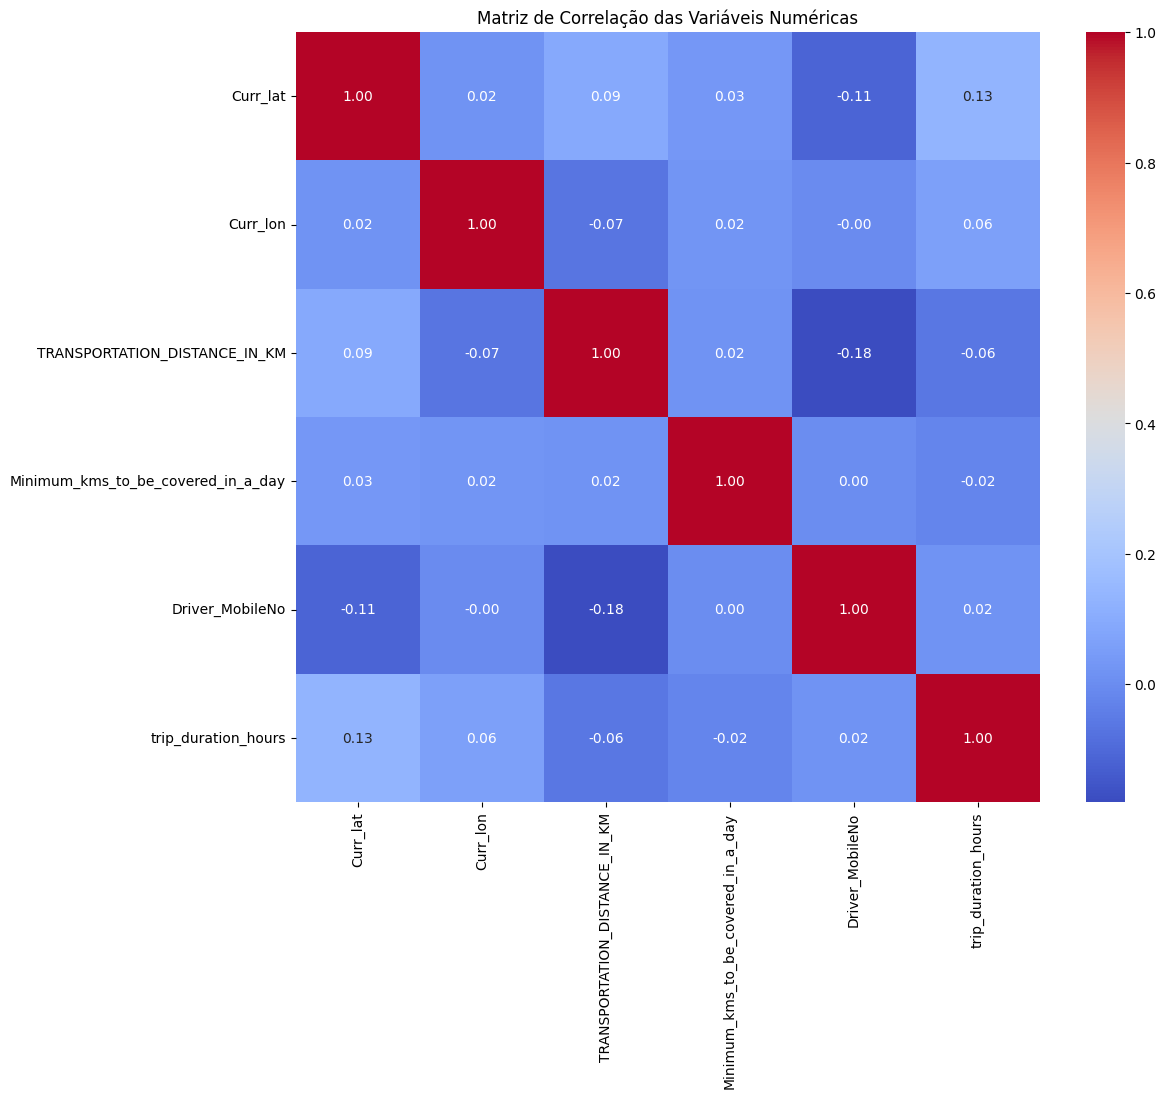

Matriz de Correlação:
                                    Curr_lat  Curr_lon  \
Curr_lat                            1.000000  0.021358   
Curr_lon                            0.021358  1.000000   
TRANSPORTATION_DISTANCE_IN_KM       0.094940 -0.068186   
Minimum_kms_to_be_covered_in_a_day  0.032770  0.022626   
Driver_MobileNo                    -0.112216 -0.004931   
trip_duration_hours                 0.132646  0.060713   

                                    TRANSPORTATION_DISTANCE_IN_KM  \
Curr_lat                                                 0.094940   
Curr_lon                                                -0.068186   
TRANSPORTATION_DISTANCE_IN_KM                            1.000000   
Minimum_kms_to_be_covered_in_a_day                       0.020870   
Driver_MobileNo                                         -0.180822   
trip_duration_hours                                     -0.064279   

                                    Minimum_kms_to_be_covered_in_a_day  \
Curr_lat     

In [120]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

print("Matriz de Correlação:")
print(correlation_matrix)

## 4. Visualizações

### 4.1. Distribuição de Entregas no Prazo vs. Atrasadas (Matplotlib/Seaborn)
Este gráfico de barras mostra a proporção de entregas que foram realizadas no prazo (G) versus as que foram atrasadas (R). É crucial para entender a eficiência geral das operações de logística.

ontime
G    2523
Name: count, dtype: int64
delay
R    4327
Name: count, dtype: int64


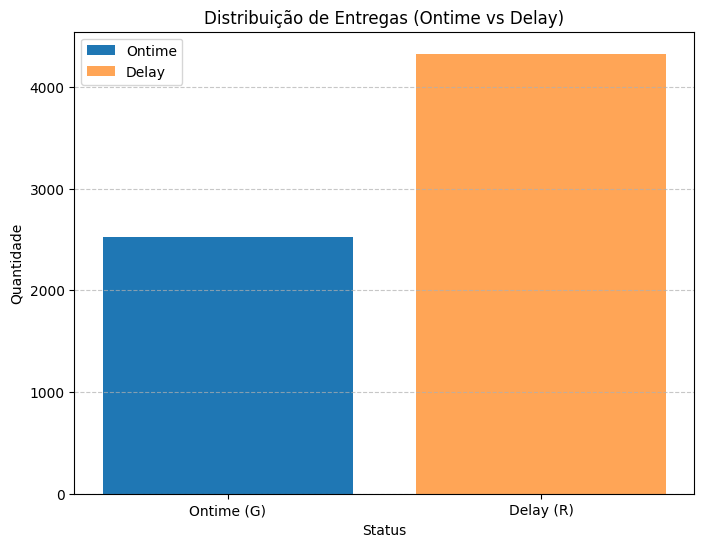

In [121]:
delivery_status_ontime = df["ontime"].value_counts()
delivery_status_delay = df["delay"].value_counts()

print(delivery_status_ontime)
print(delivery_status_delay)

plt.figure(figsize=(8, 6))

plt.bar(
    delivery_status_ontime.index.astype(str),
    delivery_status_ontime.values,
    label="Ontime",
)
plt.bar(
    delivery_status_delay.index.astype(str),
    delivery_status_delay.values,
    label="Delay",
    alpha=0.7,
)

plt.title("Distribuição de Entregas (Ontime vs Delay)")
plt.xlabel("Status")
plt.ylabel("Quantidade")
plt.xticks(ticks=[0, 1], labels=["Ontime (G)", "Delay (R)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

### 4.2. Distribuição da Duração da Viagem (Seaborn)
Um histograma com KDE (Kernel Density Estimate) para a duração da viagem em horas nos permite visualizar a forma da distribuição, identificar picos e a dispersão dos dados. Isso ajuda a entender o tempo típico de viagem e a presença de viagens excepcionalmente longas ou curtas.

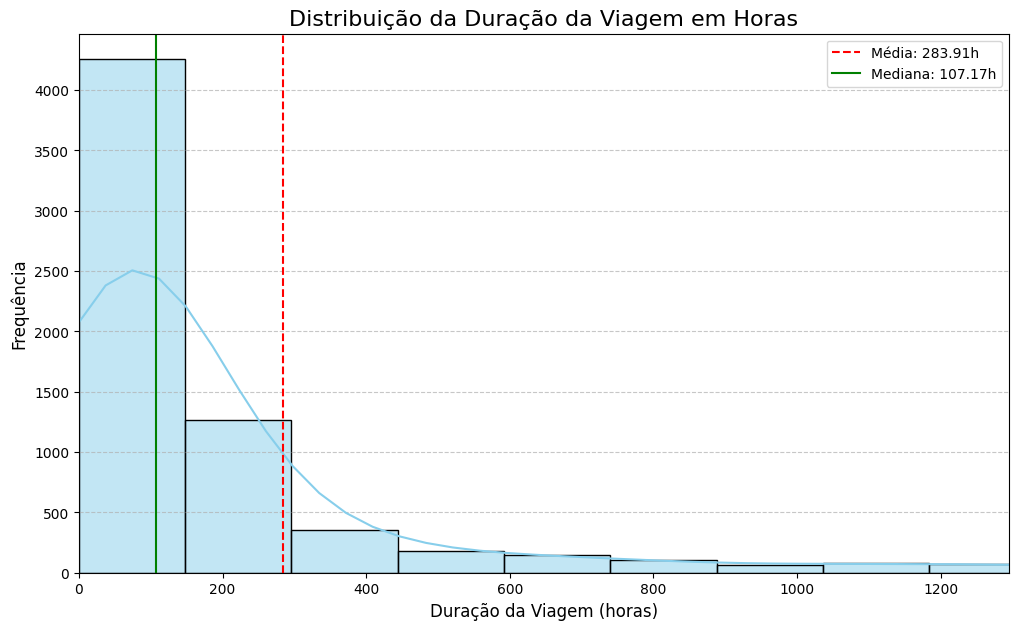

In [122]:
plt.figure(figsize=(12, 7))
sns.histplot(df["trip_duration_hours"], bins=50, kde=True, color="skyblue")
plt.title("Distribuição da Duração da Viagem em Horas", fontsize=16)
plt.xlabel("Duração da Viagem (horas)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

mean = df["trip_duration_hours"].mean()
median = df["trip_duration_hours"].median()

plt.axvline(mean, color="red", linestyle="--", label=f"Média: {mean:.2f}h")
plt.axvline(median, color="green", linestyle="-", label=f"Mediana: {median:.2f}h")

limite = df["trip_duration_hours"].quantile(0.95)
plt.xlim(0, limite)

plt.legend()
plt.show()

### 4.3. Boxplot da Duração da Viagem para Identificação de Outliers (Matplotlib/Seaborn)
O boxplot é uma ferramenta eficaz para visualizar a mediana, quartis e identificar outliers na duração da viagem. Outliers podem indicar viagens com problemas, erros de registro ou eventos incomuns que merecem investigação.

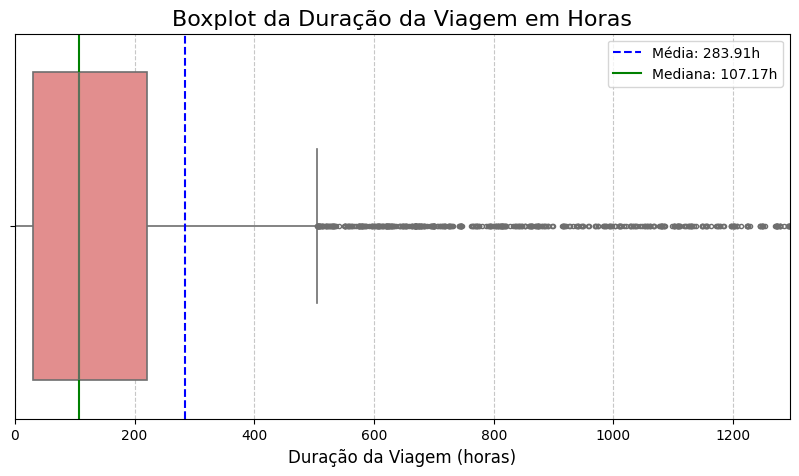

In [123]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["trip_duration_hours"], color="lightcoral", fliersize=3, linewidth=1.2)

# Título e rótulos
plt.title("Boxplot da Duração da Viagem em Horas", fontsize=16)
plt.xlabel("Duração da Viagem (horas)", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

mean = df["trip_duration_hours"].mean()
median = df["trip_duration_hours"].median()
plt.axvline(mean, color="blue", linestyle="--", label=f"Média: {mean:.2f}h")
plt.axvline(median, color="green", linestyle="-", label=f"Mediana: {median:.2f}h")

limite = df["trip_duration_hours"].quantile(0.95)
plt.xlim(0, limite)

plt.legend()
plt.show()

### 4.4. Matriz de Correlação Interativa (Plotly)
Um mapa de calor interativo da matriz de correlação permite explorar a relação entre todas as variáveis numéricas. Cores mais quentes indicam correlação positiva forte, enquanto cores mais frias indicam correlação negativa forte. A interatividade do Plotly permite inspecionar os valores exatos das correlações ao passar o mouse.

In [124]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    aspect="auto",
    title="Matriz de Correlação das Variáveis Numéricas",
    color_continuous_scale="RdBu_r",
)
fig.update_layout(title_font_size=16)
fig.show()

### 4.5. Relação entre Distância e Duração da Viagem (Seaborn)
Um gráfico de dispersão entre a distância de transporte e a duração da viagem pode revelar se há uma relação linear entre essas duas variáveis. A cor pode ser usada para diferenciar entregas no prazo e atrasadas, adicionando uma camada de insight sobre como a distância afeta a pontualidade.

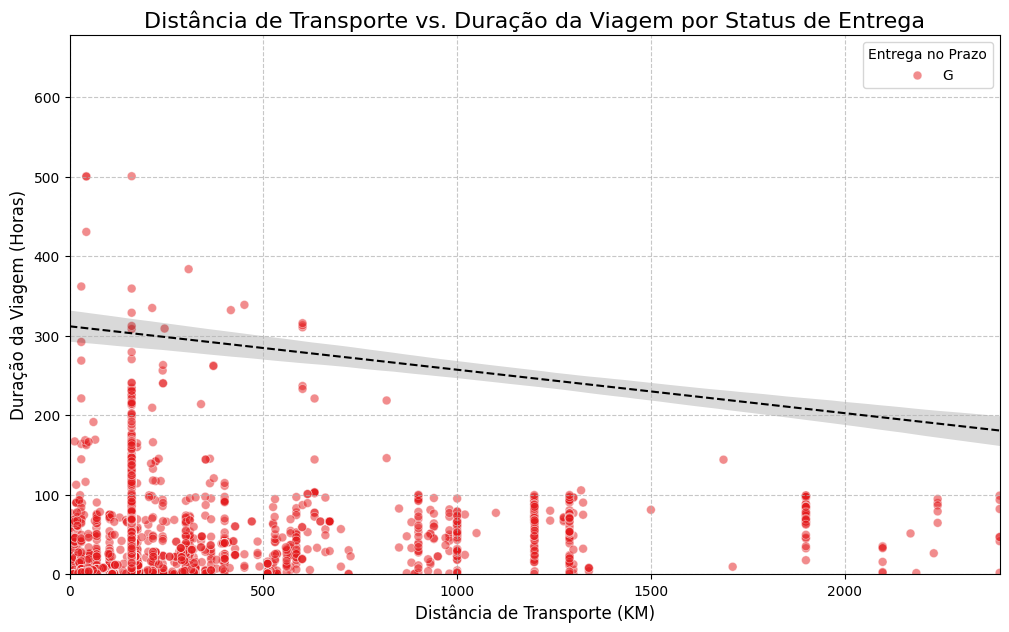

In [125]:
plt.figure(figsize=(12, 7))

sns.scatterplot(
    x="TRANSPORTATION_DISTANCE_IN_KM",
    y="trip_duration_hours",
    hue="ontime",
    data=df,
    alpha=0.5,
    s=40,
    palette="Set1",
)

sns.regplot(
    x="TRANSPORTATION_DISTANCE_IN_KM",
    y="trip_duration_hours",
    data=df,
    scatter=False,
    color="black",
    line_kws={"linewidth": 1.5, "linestyle": "--"},
)

# Títulos e labels
plt.title(
    "Distância de Transporte vs. Duração da Viagem por Status de Entrega", fontsize=16
)
plt.xlabel("Distância de Transporte (KM)", fontsize=12)
plt.ylabel("Duração da Viagem (Horas)", fontsize=12)
plt.grid(linestyle="--", alpha=0.7)

# Limitar eixos para evitar distorção
x_lim = df["TRANSPORTATION_DISTANCE_IN_KM"].quantile(0.95)
y_lim = df["trip_duration_hours"].quantile(0.90)
plt.xlim(0, x_lim)
plt.ylim(0, y_lim)

plt.legend(title="Entrega no Prazo")
plt.show()

## 5. Conclusão
Esta análise exploratória forneceu insights valiosos sobre os dados de logística. Identificamos a distribuição das entregas no prazo e atrasadas, a duração típica das viagens e a presença de outliers. A correlação entre distância e duração da viagem foi explorada, e visualizações interativas foram criadas para facilitar a compreensão dos dados.

### Principais Descobertas:
- A maioria das entregas está no prazo, mas uma parcela significativa sofre atrasos, indicando uma área para otimização.
- A duração das viagens e as distâncias percorridas variam amplamente, com alguns outliers que podem representar rotas incomuns ou problemas específicos.
- Existe uma correlação positiva entre a distância de transporte e a duração da viagem, como esperado, mas a análise detalhada pode revelar ineficiências em certas rotas ou tipos de veículos.

### Sugestões para Análises Futuras:
- Investigar os fatores que contribuem para os atrasos nas entregas (e.g., tipo de veículo, rota, condições climáticas, horário de pico).
- Realizar uma análise mais aprofundada dos outliers para entender suas causas e se devem ser tratados de forma diferente.
- Desenvolver um modelo preditivo para estimar a duração da viagem e a probabilidade de atraso, utilizando variáveis como tipo de veículo, distância, origem e destino.
- Analisar o impacto de diferentes provedores de GPS e fornecedores na eficiência das entregas.

# 6. Modelo Preditivo

O modelo preditivo será desenvolvido para prever caso uma viagem atrase ou não, utilizando as colunas delay e ontime como variáveis alvo.
Transformaremos elas em variáveis binárias, onde 1 representa que esta dentro do prazo e 0 representa o atraso com nome de TARGET.
Faremos o tratamento necessário e apresentaremos o melhor modelo utilizado.

In [126]:
df["target"] = df["ontime"].apply(lambda x: 1 if x == "G" else 0)
df

C:\Users\miguelaraujo-ieg\AppData\Local\Temp\ipykernel_32820\2941311455.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,trip_duration_hours,target
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,250.0,MANU,8.930762e+09,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE,263.650958,0
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,250.0,RAMESH,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143,20.406946,1
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,250.0,GIRI,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO,22.107443,1
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,250.0,RAVI,8.930762e+09,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD,12.045277,1
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,250.0,TAMIL,8.930762e+09,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT,13.150591,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,JTECH,WDSBKTP45240,Regular,2019-04-23 12:32:42.000,KA21A6239,"Mugabala, Bangalore Rural, Karnataka","Bangalore International Airport, Bangalore, Ka...","16.560192249175344,80.792293091599547","13.199089183304451,77.708554234959038",2019-06-14 15:20:12,...,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,HORN NP.027,3.250000,1
6876,JTECH,WDSBKTP43203,Regular,2019-03-31 15:02:34.000,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,...,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,CONTROL LEVER ASSY,2.350000,1
6877,JTECH,WDSBKTP43021,Regular,2019-03-29 18:56:26.000,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-06-14 15:20:12,...,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE,4.150000,1
6878,JTECH,WDSBKTP42685,Regular,2019-03-27 08:29:45.000,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-06-14 15:20:12,...,250.0,MANU,8.930762e+09,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE,1.100000,0


### 6.1. retirada de colunas desnecessárias

In [127]:
colunas_desnecessarias = [
    # Identificador único
    "BookingID",
    # Data/hora bruta do agendamento.
    "BookingID_Date",
    # Placa do veículo
    "vehicle_no",
    # Nome do motorista
    "Driver_Name",
    # Telefone do motorista
    "Driver_MobileNo",
    # Identificador do cliente
    "customerID",
    # Nome/código do cliente
    "customerNameCode",
    # Identificador do fornecedor
    "supplierID",
    # Nome/código do fornecedor
    "supplierNameCode",
    # Código da localização de origem
    "OriginLocation_Code",
    # Código da localização de destino
    "DestinationLocation_Code",
    # Data/hora de ping do GPS
    "Data_Ping_time",
    # ETA real: só se sabe após a viagem (causa vazamento de dados)
    "actual_eta",
    # Data de término da viagem: informação conhecida apenas após a entrega (vazamento de dados)
    "trip_end_date",
    # Ambas já foram usadas para classificar o target
    "delay",
    "ontime",
]

df = df.drop(columns=[c for c in colunas_desnecessarias if c in df.columns])

print("== BASE DEFINITIVA PARA TREINAMENTO DO MODELO ==")

df

== BASE DEFINITIVA PARA TREINAMENTO DO MODELO ==


,GpsProvider,Market/Regular,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,Current_Location,DestinationLocation,Curr_lat,Curr_lon,trip_start_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Material Shipped,trip_duration_hours,target
0,CONSENT TRACK,Market,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-21 18:59:01.000,"Vaniyambadi Rd, Valayambattu, Tamil Nadu 63575...","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",12.663500,78.649870,2020-08-17 14:59:01,320.0,32 FT Single-Axle 7MT - HCV,250.0,BRACKET / GRAB HANDLE,263.650958,0
1,VAMOSYS,Regular,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-31 20:22:22.827,"Unnamed Road, Oragadam Industrial Corridor, Va...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",12.836757,79.954428,2020-08-27 16:21:52,103.0,32 FT Multi-Axle 14MT - HCV,250.0,ZB MODEL PLATE / 3143,20.406946,1
2,CONSENT TRACK,Regular,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-31 21:59:24.987,"570, National Hwy 48, Shenoy Nagar, Chennai, T...","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",13.073956,80.225780,2020-08-27 17:57:04,300.0,1 MT Tata Ace (Open Body),250.0,LETTERING / FUSO,22.107443,1
3,VAMOSYS,Regular,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-09-01 04:48:24.503,"Singaperumal Koil - Sriperumbudur Rd, Oragadam...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",12.836686,79.950560,2020-08-28 00:47:45,61.0,32 FT Multi-Axle 14MT - HCV,250.0,LU STRUT RA / RADIUS ROD,12.045277,1
4,VAMOSYS,Regular,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-09-01 05:23:19.243,"Melmaruvathur, Tamil Nadu 603319, India","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",12.429501,79.831556,2020-08-28 01:13:48,240.0,32 FT Multi-Axle 14MT - HCV,250.0,WISHBONE / V ROD/HDT,13.150591,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,JTECH,Regular,"Mugabala, Bangalore Rural, Karnataka","Bangalore International Airport, Bangalore, Ka...","16.560192249175344,80.792293091599547","13.199089183304451,77.708554234959038",2019-04-24 15:40:00.000,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Bangalore International Airport, Bangalore, Ka...",13.024866,77.722378,2019-04-24 11:40:00,40.0,40 FT 3XL Trailer 35MT,250.0,HORN NP.027,3.250000,1
6876,JTECH,Regular,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-03-31 20:36:00.000,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Bangalore International Airport, Bangalore, Ka...",13.024788,77.722391,2019-03-31 17:30:00,31.0,40 FT 3XL Trailer 35MT,250.0,CONTROL LEVER ASSY,2.350000,1
6877,JTECH,Regular,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-03-30 01:38:00.000,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Anekal, Bangalore, Karnataka",13.024788,77.722391,2019-03-29 20:44:00,49.0,40 FT 3XL Trailer 35MT,250.0,SPARE PARTS AUTOMOBILE,4.150000,1
6878,JTECH,Regular,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-03-27 17:20:00.000,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Anekal, Bangalore, Karnataka",13.024747,77.721823,2019-03-27 15:29:00,49.0,40 FT 3XL Trailer 35MT,250.0,SPARE PARTS AUTOMOBILE,1.100000,0


In [128]:
print("=============== TARGET = 1 =============")
print(df[df["target"] == 1].describe())

=============== TARGET = 1 =============
                         Planned_ETA     Curr_lat     Curr_lon  \
count                           2523  2523.000000  2523.000000   
mean   2020-01-14 08:46:40.580752640    16.535321    78.496193   
min              1899-12-30 08:58:00     8.194479    70.504600   
25%              2019-05-16 20:37:08    12.835837    77.843340   
50%              2020-07-19 20:00:35    17.470922    77.843340   
75%    2020-08-23 23:16:34.158500096    17.470922    79.950264   
max       2020-09-01 16:44:27.290000    31.066338    94.911189   
std                              NaN     4.090491     2.969559   

                     trip_start_date  TRANSPORTATION_DISTANCE_IN_KM  \
count                           2523                    2523.000000   
mean   2020-01-11 03:26:25.146650880                     365.744055   
min              1899-12-30 00:00:00                       3.000000   
25%              2019-05-15 18:21:23                      70.000000   
50%      

In [129]:
print("=============== TARGET = 0 =============")
print(df[df["target"] == 0].describe())

=============== TARGET = 0 =============
                         Planned_ETA     Curr_lat     Curr_lon  \
count                           4316  4316.000000  4316.000000   
mean   2020-02-05 04:33:33.321773568    19.679489    78.722117   
min              1899-12-30 04:06:00     8.166790    69.657698   
25%       2019-11-01 18:40:27.500000    13.070878    76.839257   
50%              2019-12-30 20:02:48    19.027505    77.731962   
75%    2020-07-12 00:05:07.249999872    24.842642    80.027840   
max              2020-08-28 20:42:40    32.367928    95.529550   
std                              NaN     6.097987     4.398300   

                     trip_start_date  TRANSPORTATION_DISTANCE_IN_KM  \
count                           4316                    4316.000000   
mean   2020-02-03 22:01:50.519230976                     594.746501   
min              1899-12-30 00:00:00                       0.000000   
25%              2019-11-01 16:15:32                      40.000000   
50%      

### 6.2. Escolha dos modelos

#### Um outro notebook foi feito uma pipeline para avaliar os melhores parametros de cada modelo para uma base, e os resultados dos melhores modelos foram:
#### **LINK DO REPOSITÓRIO: https://github.com/Ei-Truck/Best-Model** 

**KNN (K-Nearest Neighbors)**

- Escalonamento das colunas numéricas com **MinMaxScaler**
- Codificação das colunas categóricas com **OrdinalEncoder**
- Parâmetros do modelo:
  - `n_neighbors = 3`
  - `p = 2` (distância euclidiana)
  - `weights = 'uniform'`

**Random Forest**

- Escalonamento das colunas numéricas com **StandardScaler**
- Codificação das colunas categóricas com **OrdinalEncoder**
- Parametros do modelo:
  - `bootstrap = true`
  - `criterion = "gini"`
  - `max_depth = None`
  - `max_features = sqrt`
  - `min_samples_leaf = 1`
  - `min_samples_split = 5`
  - `n_estimators = 100`

**SVM (Support Vector Machine)**

- Escalonamento das colunas numéricas com MinMaxScaler
- Codificação das colunas categóricas com OrdinalEncoder
- Parâmetros do modelo:
  - `C = 10`
  - `gamma = 'scale'`
  - `kernel = 'rbf'`


**MLP Neural Net (Multi-Layer Perceptron)**

- Escalonamento das colunas numéricas com MinMaxScaler
- Codificação das colunas categóricas com get_dummies
- Parâmetros do modelo:
  - `activation = 'relu'`
  - `alpha = 0.001`
  - `hidden_layer_sizes = (50,)`
  - `learning_rate = 'constant'`
  - `solver = 'adam'`

**Decision Tree (Árvore de Decisão)**

- Escalonamento das colunas numéricas com MinMaxScaler
- Codificação das colunas categóricas com OrdinalEncoder
- Parâmetros do modelo:
  - `criterion = 'gini'`
  - `max_depth = 10`
  - `max_features = None`
  - `min_samples_leaf = 1`
  - `min_samples_split = 2`
  - `splitter = 'best'`

### 6.3. Formatando a base

#### 6.3.0 Separando o treino e teste

In [130]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

#### 6.3.1 Indentificando as colunas

In [131]:
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns
X_train

,GpsProvider,Market/Regular,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,Current_Location,DestinationLocation,Curr_lat,Curr_lon,trip_start_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Material Shipped,trip_duration_hours
2264,EKTA,Regular,"Jamalpur, Gurgaon, Haryana","Khorajnanoda, Ahmedabad, Gujarat","28.373519,76.835337","22.961777,72.094219",2020-07-25 20:49:50.000,"Unnamed Road, Chharodi, Gujarat 382170, India","Khorajnanoda, Ahmedabad, Gujarat",23.004037,72.262908,2020-07-21 16:49:50,1000.0,32 FT Multi-Axle 14MT - HCV,250.0,AUTO PARTS,46.006131
977,CONSENT TRACK,Regular,"Khorajnanoda, Ahmedabad, Gujarat","Singaperumalkoil, Kanchipuram, Tamil Nadu","22.961777,72.094219","12.786517,79.975221",2020-08-17 15:12:15.000,"Unnamed Road, Chharodi, Gujarat 382170, India","Singaperumalkoil, Kanchipuram, Tamil Nadu",23.004566,72.263432,2020-08-17 14:53:00,1900.0,32 FT Single-Axle 7MT - HCV,250.0,RA90 RECTIFIER 2SA28-24V-60A,65.337600
809,CONSENT TRACK,Regular,"ASHOK LEYLAND ENNORE,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.2150,80.3200","12.7660,77.7860",2020-08-24 14:14:48.577,"Plat No.7,ESI Ring Rd, MGR Nagar, Mookondapall...","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",12.752212,77.798160,2020-08-20 10:10:15,310.0,40 FT 3XL Trailer 35MT,250.0,COP LEVER INNER,3.730909
2449,EKTA,Regular,"Khorajnanoda, Ahmedabad, Gujarat","Jamalpur, Gurgaon, Haryana","22.961777,72.094219","28.373519,76.835337",2020-07-18 14:57:50.000,"Rewari - Kotkasim Rd, Chhuriawas, Haryana 1231...","Jamalpur, Gurgaon, Haryana",28.136482,76.645289,2020-07-14 10:57:50,900.0,32 FT Multi-Axle 14MT - HCV,250.0,EMPTY TRAYS,99.916846
2241,VAMOSYS,Regular,"Shive, Pune, Maharashtra","Pondur, Kanchipuram, Tamil Nadu","18.750621,73.87719","12.930429,79.931163",2020-07-22 21:38:23.000,"Perumalpattu - Kottamedu Rd, Oragadam Industri...","Pondur, Kanchipuram, Tamil Nadu",12.833760,79.951826,2020-07-18 17:38:23,1290.0,32 FT Multi-Axle 14MT - HCV,250.0,AUTO PARTS,138.663637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,CONSENT TRACK,Regular,"Sonai, Kolkata, West Bengal","Rashbehari Market, North Dinajpur, West Bengal","23.525267916088961,87.264424348570884","25.641719007694395,88.127819129724287",2019-12-20 07:33:37.000,"NH19, Bagabanpur, West Bengal 713155, India","Rashbehari Market, North Dinajpur, West Bengal",22.956785,88.392850,2019-12-18 17:04:37,401.0,40 FT 3XL Trailer 35MT,250.0,SOL. RELAY WITH CABLE ASSY,448.955019
5223,CONSENT TRACK,Regular,"Thaikkattukara, Ernakulam, Kerala","Perumanur, Ernakulam, Kerala","10.082622,76.349257","9.9606167721675352,76.285507738460424",2019-11-01 18:38:06.000,"39/4825, Rajagiri, Ravipuram, M.G.Raod, Cochin...","Perumanur, Ernakulam, Kerala",9.960169,76.287668,2019-11-01 16:14:06,25.0,40 FT 3XL Trailer 35MT,250.0,M70 STARTER MOTOR 12V 0.9KW,166.446772
5258,CONSENT TRACK,Regular,"Kollur, Medak, Telangana","Nanajipur, Rangareddy, Telangana","17.46628393767336,78.215746853583028","17.235460173235783,78.4271247252794",2019-10-23 23:27:12.000,"Biocon Limited Rd, IDA Pashamylaram, Hyderabad...","Nanajipur, Rangareddy, Telangana",17.541224,78.179970,2019-10-23 18:51:12,48.0,40 FT 3XL Trailer 35MT,250.0,Hydraulic Cylinder,380.874845
5422,CONSENT TRACK,Regular,"Mugabala, Bangalore Rural, Karnataka","Chikkabidarkal, Bangalore, Karnataka","12.992699792116747,77.803841411108593","12.777874729699617,77.642275537347089",2019-09-18 18:24:20.000,"175/1, Soukya Rd, Bengaluru, Karnataka 560067,...","Chikkabidarkal, Bangalore, Karnataka",12.991526,77.804833,2019-09-18 17:03:54,31.0,40 FT 3XL Trailer 35MT,250.0,3SIA140 ALTERNATORS,699.557092


### 6.4 Preprocessando as colunas

In [132]:
preprocessor_knn = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        (
            "cat",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
            cat_cols,
        ),
    ]
)

preprocessor_rf = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), num_cols),
        (
            "cat",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
            cat_cols,
        ),
    ]
)

preprocessor_svm = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        (
            "cat",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
            cat_cols,
        ),
    ]
)

preprocessor_mlp = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

preprocessor_dt = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_cols),
        (
            "cat",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
            cat_cols,
        ),
    ]
)

### 6.5  Fazendo os modelos

In [133]:
knn_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor_knn),
        ("classifier", KNeighborsClassifier(n_neighbors=3, p=2, weights="uniform")),
    ]
)

rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor_rf),
        (
            "classifier",
            RandomForestClassifier(
                bootstrap=True,
                criterion="gini",
                max_depth=None,
                max_features="sqrt",
                min_samples_leaf=1,
                min_samples_split=5,
                n_estimators=100,
                random_state=42,
            ),
        ),
    ]
)

svm_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor_svm),
        (
            "classifier",
            SVC(C=10, gamma="scale", kernel="rbf", probability=True, random_state=42),
        ),
    ]
)

mlp_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor_mlp),
        (
            "classifier",
            MLPClassifier(
                activation="relu",
                alpha=0.001,
                hidden_layer_sizes=(50,),
                learning_rate="constant",
                solver="adam",
                random_state=42,
                max_iter=500,
            ),
        ),
    ]
)

dt_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor_dt),
        (
            "classifier",
            DecisionTreeClassifier(
                criterion="gini",
                max_depth=10,
                max_features=None,
                min_samples_leaf=1,
                min_samples_split=2,
                splitter="best",
                random_state=42,
            ),
        ),
    ]
)

### 6.6 Treinando os modelos

#### 6.6.1 Random Forest 

In [134]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  Index(['Curr_lat', 'Curr_lon', 'TRANSPORTATION_DISTANCE_IN_KM',
       'Minimum_kms_to_be_covered_in_a_day', 'trip_duration_hours'],
      dtype='object')),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['GpsProvider', 'Market/Regular ', 'Origin_Location',
       'Destination_Location', 'Org_lat_lon', 'Des_lat_lon',
       'Current_Location', 'DestinationLocation', 'vehicleType',
       'Material Shipped'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(min_samples_split=5, random_state=42))])

#### 6.6.2 KNN

In [135]:
knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Curr_lat', 'Curr_lon', 'TRANSPORTATION_DISTANCE_IN_KM',
       'Minimum_kms_to_be_covered_in_a_day', 'trip_duration_hours'],
      dtype='object')),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['GpsProvider', 'Market/Regular ', 'Origin_Location',
       'Destination_Location', 'Org_lat_lon', 'Des_lat_lon',
       'Current_Location', 'DestinationLocation', 'vehicleType',
       'Material Shipped'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

#### 6.6.3 SVM

In [136]:
svm_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Curr_lat', 'Curr_lon', 'TRANSPORTATION_DISTANCE_IN_KM',
       'Minimum_kms_to_be_covered_in_a_day', 'trip_duration_hours'],
      dtype='object')),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['GpsProvider', 'Market/Regular ', 'Origin_Location',
       'Destination_Location', 'Org_lat_lon', 'Des_lat_lon',
       'Current_Location', 'DestinationLocation', 'vehicleType',
       'Material Shipped'],
      dtype='object'))])),
                ('classifier', SVC(C=10, probability=True, random_state=42))])

#### 6.6.4 MLP

In [137]:
mlp_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Curr_lat', 'Curr_lon', 'TRANSPORTATION_DISTANCE_IN_KM',
       'Minimum_kms_to_be_covered_in_a_day', 'trip_duration_hours'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['GpsProvider', 'Market/Regular ', 'Origin_Location',
       'Destination_Location', 'Org_lat_lon', 'Des_lat_lon',
       'Current_Location', 'DestinationLocation', 'vehicleType',
       'Material Shipped'],
      dtype='object'))])),
                ('classifier',
                 MLPClassifier(alpha=0.001, hidden_layer_sizes=(50,),
                               max_iter=500, random_state=42))])

#### 6.6.5 Decision Tree

In [138]:
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Curr_lat', 'Curr_lon', 'TRANSPORTATION_DISTANCE_IN_KM',
       'Minimum_kms_to_be_covered_in_a_day', 'trip_duration_hours'],
      dtype='object')),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['GpsProvider', 'Market/Regular ', 'Origin_Location',
       'Destination_Location', 'Org_lat_lon', 'Des_lat_lon',
       'Current_Location', 'DestinationLocation', 'vehicleType',
       'Material Shipped'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

### 6.7 Avaliação e métricas dos modelos
Vamos avaliar o desempenho do modelo utilizando:
- **Acurácia**
- **Precisão**
- **Recall**
- **F1-Score**
- **Matriz de Confusão**


#### 6.7.1 KNN

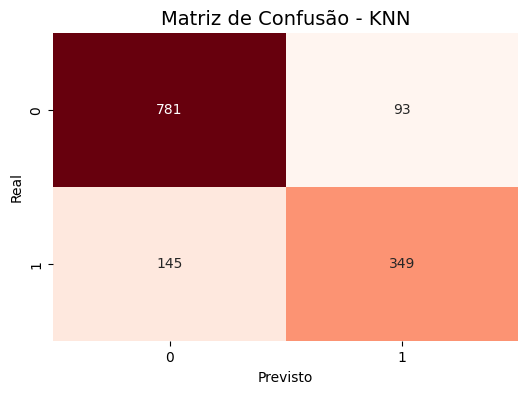

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       874
           1       0.79      0.71      0.75       494

    accuracy                           0.83      1368
   macro avg       0.82      0.80      0.81      1368
weighted avg       0.82      0.83      0.82      1368



In [139]:
y_pred_knn = knn_model.predict(X_test)

plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Reds", cbar=False
)
plt.title("Matriz de Confusão - KNN", fontsize=14)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

print(classification_report(y_test, y_pred_knn))

#### 6.7.2 Random Forest

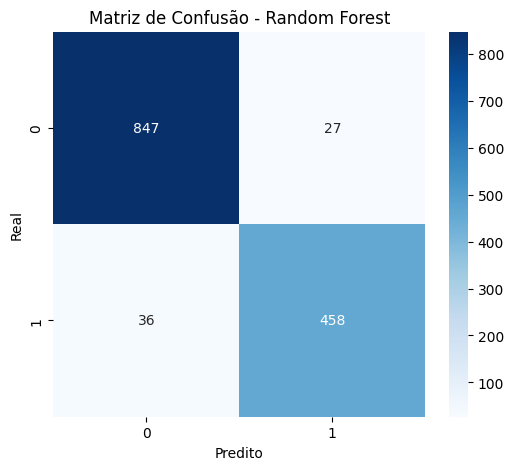

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       874
           1       0.94      0.93      0.94       494

    accuracy                           0.95      1368
   macro avg       0.95      0.95      0.95      1368
weighted avg       0.95      0.95      0.95      1368



In [140]:
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf_model.named_steps["classifier"].classes_,
    yticklabels=rf_model.named_steps["classifier"].classes_,
)

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()

print(classification_report(y_test, y_pred))

#### 6.7.3 SVM

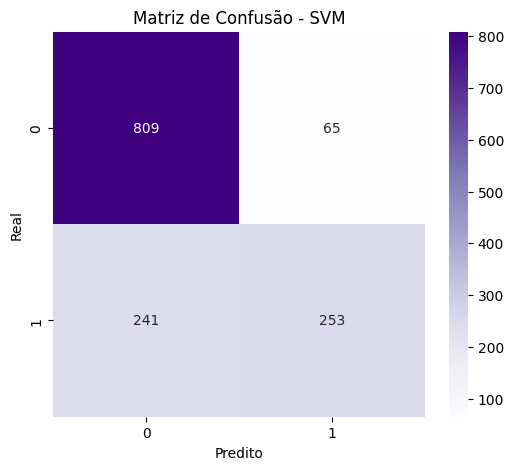

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       874
           1       0.80      0.51      0.62       494

    accuracy                           0.78      1368
   macro avg       0.78      0.72      0.73      1368
weighted avg       0.78      0.78      0.76      1368



In [141]:
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=svm_model.named_steps["classifier"].classes_,
    yticklabels=svm_model.named_steps["classifier"].classes_,
)

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - SVM")
plt.show()

print(classification_report(y_test, y_pred))

#### 6.7.4 MLP

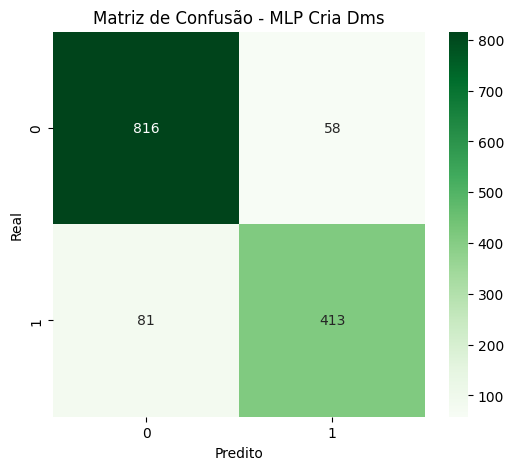

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       874
           1       0.88      0.84      0.86       494

    accuracy                           0.90      1368
   macro avg       0.89      0.88      0.89      1368
weighted avg       0.90      0.90      0.90      1368



In [142]:
y_pred = mlp_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=mlp_model.named_steps["classifier"].classes_,
    yticklabels=mlp_model.named_steps["classifier"].classes_,
)

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - MLP Cria Dms")
plt.show()

print(classification_report(y_test, y_pred))

#### 6.7.5 Decision Tree

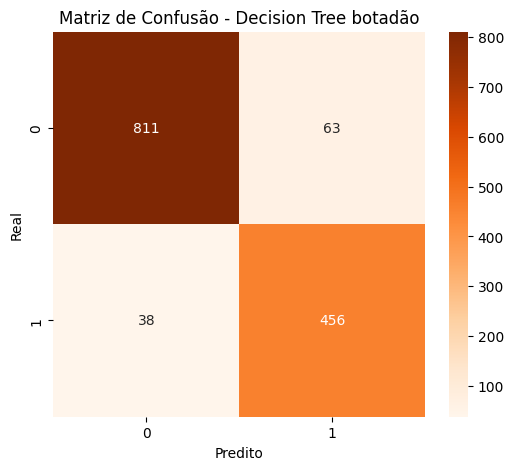

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       874
           1       0.88      0.92      0.90       494

    accuracy                           0.93      1368
   macro avg       0.92      0.93      0.92      1368
weighted avg       0.93      0.93      0.93      1368



In [143]:
y_pred = dt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=dt_model.named_steps["classifier"].classes_,
    yticklabels=dt_model.named_steps["classifier"].classes_,
)

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Decision Tree botadão")
plt.show()

print(classification_report(y_test, y_pred))

### Motivo do das métricas altas

- Todos os registros com target = 1 têm Minimum_kms_to_be_covered_in_a_day entre 250 e 275 e trip_duration_hours até ~500.
- Todos os registros com target = 0 têm Minimum_kms_to_be_covered_in_a_day entre 0 e 275 e trip_duration_hours começando em 0.28 e indo até 1792.

Ou seja, existe uma separação quase perfeita dessas duas features para o target.

# 7. Salvando o modelo em um pickle
Salvar o modelo em um pickle é necessário para que armazene seu conhecimento para que não seja necessário treinalo novamente, somente usufruindo de sua própria classificação mais para frente

### 7.1 Salvando o arquivo .pkl

In [144]:
with open("t_l_tracking_dataset_knn_model.pkl", "wb") as f:
    pickle.dump(knn_model, f)

with open("t_l_tracking_dataset_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("t_l_tracking_dataset_svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

with open("t_l_tracking_dataset_mlp_model.pkl", "wb") as f:
    pickle.dump(mlp_model, f)

with open("t_l_tracking_dataset_dt_model.pkl", "wb") as f:
    pickle.dump(dt_model, f)